# Baseline

In [1]:
import string
from nltk.tokenize import word_tokenize, wordpunct_tokenize
from pymorphy2 import MorphAnalyzer
from pymystem3 import Mystem
from nltk.corpus import stopwords
from string import punctuation
import re
import nltk
from pymystem3 import Mystem
mystem = Mystem()

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
%matplotlib inline  
pd.set_option('max_colwidth', 1000)

In [4]:
train_data = pd.read_csv('./data2/train_sentiment_ttk.tsv', sep='\t')
test_data = pd.read_csv('./data2/test_sentiment_ttk.tsv', sep='\t')

In [248]:
train_data.head()

,label,text
0,0,"@mkomov Максим, Вашем письмо мы получили. Наши сотрудники свяжутся с Вами завтра и направят запрос инженерам для проверки. #билайн"
1,0,«Мегафон» стал владельцем 50% акций «Евросети»
2,-1,"RT @fuckkiev: “@EvaKobb: МТС Россия прислала жителям Херсонщины сообщения, в которых обозвала украинцев фашистами? http://t.co/RbSesXlOUZ” …"
3,1,ВИДЕО: http://t.co/PSMLAhR4fI Реклама со смехом МТС - Супер 0
4,-1,"@parfenov1960 потому что МТС достало, а пчел ненавижу с детства, как и их мёд!"


In [5]:
count_vectorizer = CountVectorizer()
count_vectorizer.fit(train_data.text.values) 

X_train = count_vectorizer.transform(train_data.text.values)
X_test = count_vectorizer.transform(test_data.text.values)

y_train = train_data.label.values
y_test = test_data.label.values

clf = LogisticRegression(penalty="l1", C=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))
print('Макросредняя F1 мера - ',f1_score(y_test, y_pred, average='macro'))
print('Микросредняя F1 мера - ',f1_score(y_test, y_pred, average='micro'))

             precision    recall  f1-score   support

         -1       0.69      0.59      0.64       902
          0       0.61      0.80      0.69       972
          1       0.30      0.03      0.06       180

avg / total       0.62      0.64      0.61      2054

Макросредняя F1 мера -  0.46306421211286786
Микросредняя F1 мера -  0.6387536514118792


In [6]:
import seaborn as sns

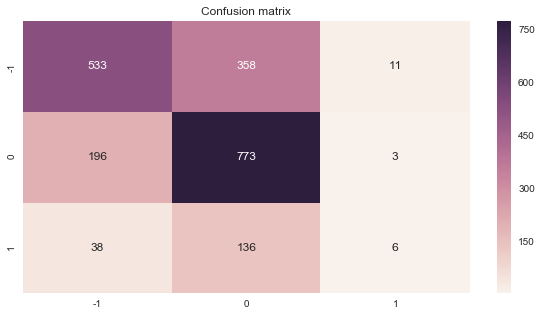

In [13]:
labels = clf.classes_
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, 
            fmt="d", xticklabels=labels, yticklabels=labels, ax=ax)
plt.title("Confusion matrix")
plt.show()

In [14]:
tfidf = TfidfVectorizer()
tfidf.fit(train_data.text.values)
X_train = tfidf.transform(train_data.text.values)
X_test = tfidf.transform(test_data.text.values)

clf = LogisticRegression(penalty='l1')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# замерим качество классификации
print(classification_report(y_test, y_pred))
print('Макросредняя F1 мера - ',f1_score(y_test, y_pred, average='macro'))
print('Микросредняя F1 мера - ',f1_score(y_test, y_pred, average='micro'))

             precision    recall  f1-score   support

         -1       0.70      0.69      0.69       902
          0       0.66      0.76      0.71       972
          1       0.37      0.09      0.15       180

avg / total       0.65      0.67      0.65      2054

Макросредняя F1 мера -  0.5172604008633273
Микросредняя F1 мера -  0.6708860759493671


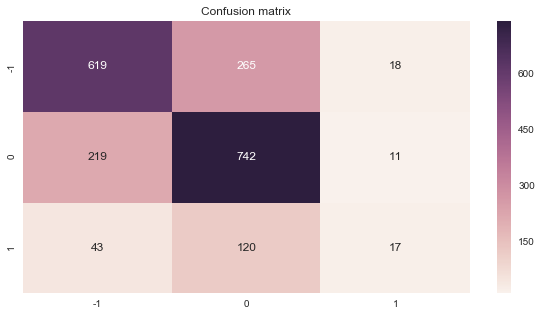

In [15]:
labels = clf.classes_
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, 
            fmt="d", xticklabels=labels, yticklabels=labels, ax=ax)
plt.title("Confusion matrix")
plt.show()

# Улучшение

## Лемматизация

In [7]:
from datetime import datetime

In [8]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

In [55]:
morph = MorphAnalyzer()

def delete_links(text):
    reg = '(http://|www.)[^ ]*?( |$)'
    text = re.sub(reg,'',text).strip()
    reg = ' [^ ]*?.[a-z]+'
    text = re.sub(reg,'',text).strip()
    reg = '@'
    text = re.sub(reg,'',text).strip()
    return text

def normalize(text):
    text = delete_links(text)
    lemmas = [morph.parse(token)[0].normal_form for token in tknzr.tokenize(text)]
    return ' '.join(lemmas)

def preprocessing(text):
    text = delete_links(text)
    text = normalize(text)
    return text

In [58]:
start = datetime.now()
train_data['pre'] = train_data['text'].apply(preprocessing)
print (datetime.now()-start)

0:00:27.814263


In [250]:
train_data.head()

,label,text,pre
0,0,"@mkomov Максим, Вашем письмо мы получили. Наши сотрудники свяжутся с Вами завтра и направят запрос инженерам для проверки. #билайн","mkomov максим , ваш письмо мы получить . наш сотрудник связаться с вы завтра и направить запрос инженер для проверка . #билайн"
1,0,«Мегафон» стал владельцем 50% акций «Евросети»,« мегафон » стать владелец 50 % акция « евросеть »
2,-1,"RT @fuckkiev: “@EvaKobb: МТС Россия прислала жителям Херсонщины сообщения, в которых обозвала украинцев фашистами? http://t.co/RbSesXlOUZ” …","rt : kobb : мтс россия прислать житель херсонщина сообщение , в который обозвать украинец фашист ? …"
3,1,ВИДЕО: http://t.co/PSMLAhR4fI Реклама со смехом МТС - Супер 0,видео : реклама с смех мтс - супер 0
4,-1,"@parfenov1960 потому что МТС достало, а пчел ненавижу с детства, как и их мёд!","parfenov 1960 потому что мтс достать , а пчела ненавидеть с детство , как и они мёд !"


In [59]:
start = datetime.now()
test_data['pre'] = test_data['text'].apply(preprocessing)
print (datetime.now()-start)

0:00:08.150278


             precision    recall  f1-score   support

         -1       0.68      0.69      0.68       902
          0       0.66      0.73      0.69       972
          1       0.43      0.17      0.24       180

avg / total       0.65      0.66      0.65      2054

Макросредняя F1 мера -  0.5391504994841599
Микросредняя F1 мера -  0.6616358325219085


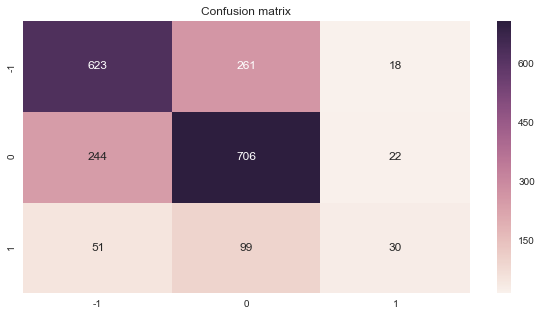

In [252]:
tfidf = TfidfVectorizer()
tfidf.fit(train_data.pre.values)
X_train = tfidf.transform(train_data.pre.values)
X_test = tfidf.transform(test_data.pre.values)

clf = LogisticRegression(penalty='l1')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

# замерим качество классификации
print(classification_report(y_test, y_pred))
print('Макросредняя F1 мера - ',f1_score(y_test, y_pred, average='macro'))
print('Микросредняя F1 мера - ',f1_score(y_test, y_pred, average='micro'))

labels = clf.classes_
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, 
            fmt="d", xticklabels=labels, yticklabels=labels, ax=ax)
plt.title("Confusion matrix")
plt.show()

In [9]:
import sklearn

In [10]:
from sklearn.feature_selection import SelectFromModel

Чтобы ускорить обучение, будем выбирать только те признаки, которые значимы (по l1 регуляризации зануляем неважные)

             precision    recall  f1-score   support

         -1       0.68      0.69      0.68       902
          0       0.66      0.73      0.69       972
          1       0.43      0.17      0.24       180

avg / total       0.65      0.66      0.65      2054

Макросредняя F1 мера -  0.5391504994841599
Микросредняя F1 мера -  0.6616358325219085


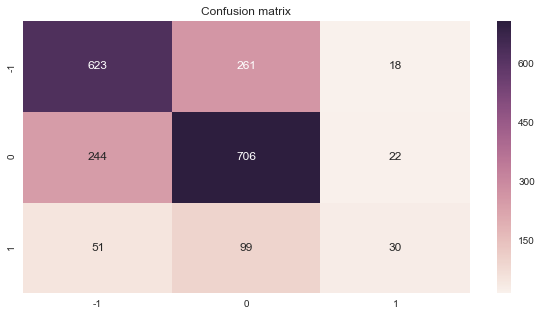

In [255]:
tfidf = TfidfVectorizer()
tfidf.fit(train_data.pre.values)
X_train = tfidf.transform(train_data.pre.values)
X_test = tfidf.transform(test_data.pre.values)

clf = LogisticRegression(penalty='l1')
clf.fit(X_train, y_train)

model = SelectFromModel(clf, prefit=True)

X_new = model.transform(X_train)
X_new_ts = model.transform(X_test)
X_new_ts.shape

clf = LogisticRegression(penalty='l1')
clf.fit(X_new, y_train)

y_pred = clf.predict(X_new_ts)

# замерим качество классификации
print(classification_report(y_test, y_pred))
print('Макросредняя F1 мера - ',f1_score(y_test, y_pred, average='macro'))
print('Микросредняя F1 мера - ',f1_score(y_test, y_pred, average='micro'))

labels = clf.classes_
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, 
            fmt="d", xticklabels=labels, yticklabels=labels, ax=ax)
plt.title("Confusion matrix")
plt.show()

Тот же результат, но чуть быстрее

In [36]:
def experiments(X_train, y_train):
    clf = LogisticRegression(penalty='l1')
    clf.fit(X_train, y_train)

    model = SelectFromModel(clf, prefit=True)

    X_new = model.transform(X_train)
    X_new_ts = model.transform(X_test)
    print(X_new_ts.shape)

    clf = LogisticRegression(penalty='l1')
    clf.fit(X_new, y_train)

    y_pred = clf.predict(X_new_ts)

    # замерим качество классификации
    print(classification_report(y_test, y_pred))
    print('Макросредняя F1 мера - ',f1_score(y_test, y_pred, average='macro'))
    print('Микросредняя F1 мера - ',f1_score(y_test, y_pred, average='micro'))

    labels = clf.classes_
    fig, ax = plt.subplots(figsize=(10,5))
    sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, 
                fmt="d", xticklabels=labels, yticklabels=labels, ax=ax)
    plt.title("Confusion matrix")
    plt.show()

** ngram_range **

(2054, 713)
             precision    recall  f1-score   support

         -1       0.68      0.69      0.68       902
          0       0.66      0.73      0.69       972
          1       0.43      0.17      0.24       180

avg / total       0.65      0.66      0.65      2054

Макросредняя F1 мера -  0.5391504994841599
Микросредняя F1 мера -  0.6616358325219085


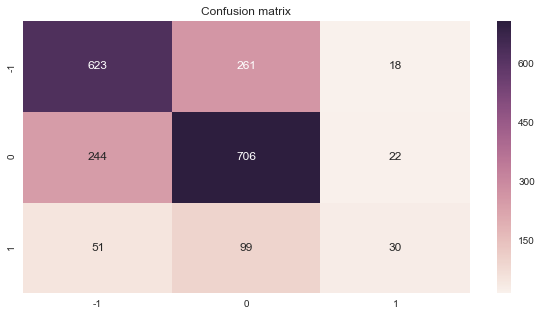

In [258]:
tfidf = TfidfVectorizer(ngram_range =(1,1))
tfidf.fit(train_data.pre.values)
X_train = tfidf.transform(train_data.pre.values)
X_test = tfidf.transform(test_data.pre.values)

experiments(X_train, y_train)

(2054, 361)
             precision    recall  f1-score   support

         -1       0.64      0.79      0.71       902
          0       0.71      0.64      0.67       972
          1       0.38      0.16      0.22       180

avg / total       0.65      0.66      0.65      2054

Макросредняя F1 мера -  0.533975695298222
Микросредняя F1 мера -  0.6621226874391432


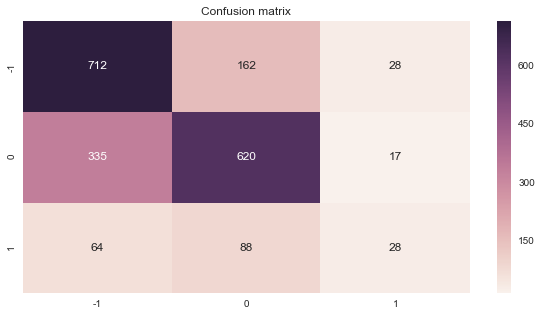

In [259]:
tfidf = TfidfVectorizer(ngram_range =(1,3))
tfidf.fit(train_data.pre.values)
X_train = tfidf.transform(train_data.pre.values)
X_test = tfidf.transform(test_data.pre.values)

experiments(X_train, y_train)

In [11]:
from nltk.stem.snowball import SnowballStemmer 
stemmer = SnowballStemmer ('russian')
def delete_links(text):
    reg = '(http://|www.)[^ ]*?( |$)'
    text = re.sub(reg,'',text).strip()
    reg = ' [^ ]*?.[a-z]+'
    text = re.sub(reg,'',text).strip()
    reg = '@'
    text = re.sub(reg,'',text).strip()
    return text

def normalize(text):
    text = delete_links(text)
    lemmas = [stemmer.stem(token) for token in tknzr.tokenize(text)]
    return ' '.join(lemmas)

def preprocessing(text):
    text = delete_links(text)
    text = normalize(text)
    return text

In [12]:
start = datetime.now()
train_data['pre2'] = train_data['text'].apply(preprocessing)
print (datetime.now()-start)
start = datetime.now()
test_data['pre2'] = test_data['text'].apply(preprocessing)
print (datetime.now()-start)

0:00:12.832844
0:00:03.193491


(2054, 705)
             precision    recall  f1-score   support

         -1       0.69      0.68      0.69       902
          0       0.66      0.74      0.70       972
          1       0.44      0.18      0.25       180

avg / total       0.65      0.66      0.65      2054

Макросредняя F1 мера -  0.5453659923597036
Микросредняя F1 мера -  0.6645569620253164


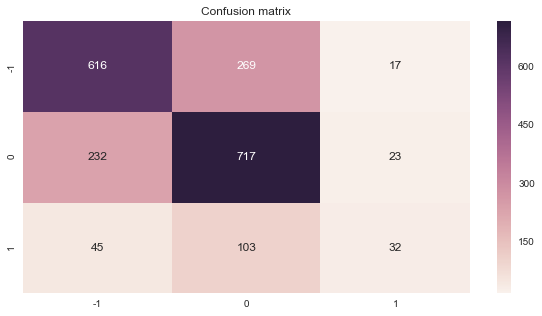

In [262]:
tfidf = TfidfVectorizer(ngram_range =(1,1))
tfidf.fit(train_data.pre2.values)
X_train = tfidf.transform(train_data.pre2.values)
X_test = tfidf.transform(test_data.pre2.values)

experiments(X_train, y_train)

(2054, 354)
             precision    recall  f1-score   support

         -1       0.64      0.78      0.70       902
          0       0.71      0.65      0.68       972
          1       0.45      0.18      0.26       180

avg / total       0.66      0.66      0.65      2054

Макросредняя F1 мера -  0.5466531829209564
Микросредняя F1 мера -  0.6635832521908471


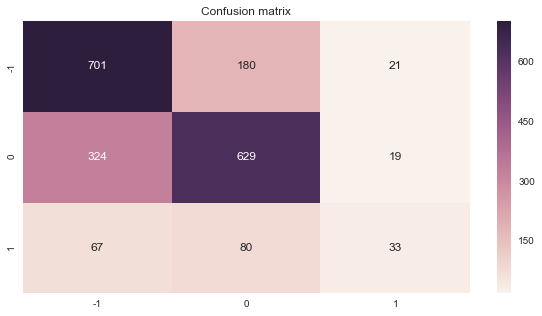

In [263]:
tfidf = TfidfVectorizer(ngram_range =(1,3))
tfidf.fit(train_data.pre2.values)
X_train = tfidf.transform(train_data.pre2.values)
X_test = tfidf.transform(test_data.pre2.values)

experiments(X_train, y_train)

(2054, 670)
             precision    recall  f1-score   support

         -1       0.70      0.72      0.71       902
          0       0.69      0.75      0.72       972
          1       0.50      0.18      0.27       180

avg / total       0.68      0.69      0.67      2054

Макросредняя F1 мера -  0.5650584846094043
Микросредняя F1 мера -  0.686952288218111


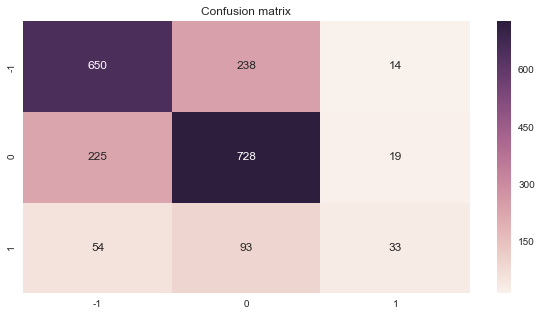

In [264]:
tfidf = TfidfVectorizer(ngram_range =(1,1), token_pattern='\S+')
tfidf.fit(train_data.pre2.values)
X_train = tfidf.transform(train_data.pre2.values)
X_test = tfidf.transform(test_data.pre2.values)

experiments(X_train, y_train)

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [37]:
def experiments_2(X_train, y_train, grid):
    clf = LogisticRegression(penalty='l1')
    clf.fit(X_train, y_train)

    model = SelectFromModel(clf, prefit=True)

    X_new = model.transform(X_train)
    X_new_ts = model.transform(X_test)
    print(X_new_ts.shape)

    grid.fit(X_new, y_train)

    y_pred = grid.predict(X_new_ts)

    # замерим качество классификации
    print(classification_report(y_test, y_pred))
    print('Макросредняя F1 мера - ',f1_score(y_test, y_pred, average='macro'))
    print('Микросредняя F1 мера - ',f1_score(y_test, y_pred, average='micro'))

    labels = grid.classes_
    fig, ax = plt.subplots(figsize=(10,5))
    sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, 
                fmt="d", xticklabels=labels, yticklabels=labels, ax=ax)
    plt.title("Confusion matrix")
    plt.show()

(2054, 669)
             precision    recall  f1-score   support

         -1       0.69      0.77      0.72       902
          0       0.75      0.57      0.65       972
          1       0.27      0.46      0.34       180

avg / total       0.68      0.65      0.65      2054

Макросредняя F1 мера -  0.5694801354290092
Микросредняя F1 мера -  0.6465433300876339


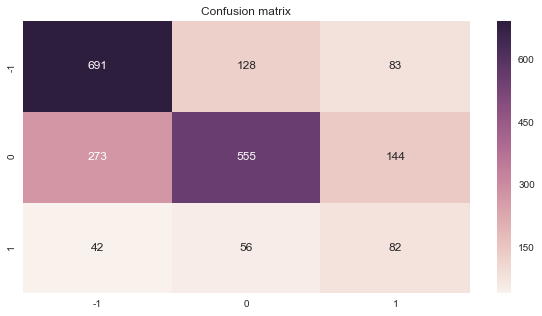

In [282]:
tfidf = TfidfVectorizer(ngram_range =(1,1), token_pattern='\S+')
tfidf.fit(train_data.pre2.values)

X_train = tfidf.transform(train_data.pre2.values)
X_test = tfidf.transform(test_data.pre2.values)

svc_rbf = SVC(class_weight='balanced',kernel = 'rbf')
grid_ln = GridSearchCV(cv=5, scoring='f1_weighted', estimator=svc_rbf, 
                       param_grid={'C':[1.e-4, 1, 100, 10000]})

experiments_2(X_train, y_train, grid_ln)

(2054, 452)
             precision    recall  f1-score   support

         -1       0.65      0.79      0.71       902
          0       0.79      0.52      0.62       972
          1       0.26      0.46      0.33       180

avg / total       0.68      0.63      0.64      2054

Макросредняя F1 мера -  0.5543110286968365
Микросредняя F1 мера -  0.6304771178188899


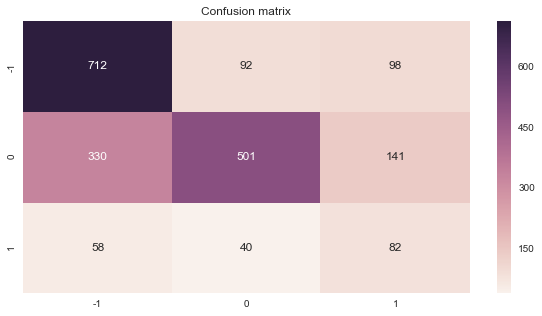

In [24]:
tfidf = TfidfVectorizer(ngram_range =(1,2), token_pattern='\S+')
tfidf.fit(train_data.pre2.values)

X_train = tfidf.transform(train_data.pre2.values)
X_test = tfidf.transform(test_data.pre2.values)

svc_rbf = SVC(class_weight='balanced',kernel = 'rbf',decision_function_shape='ovo')
grid_ln = GridSearchCV(cv=5, scoring='f1_weighted', estimator=svc_rbf, 
                       param_grid={'C':[1000, 10000, 100000]})

experiments_2(X_train, y_train, grid_ln)

In [33]:
def experiments_3(X_train, y_train, grid):
    clf = LogisticRegression(penalty='l1')
    clf.fit(X_train, y_train)

    model = SelectFromModel(clf, prefit=True, threshold = 0.000001)

    X_new = model.transform(X_train)
    X_new_ts = model.transform(X_test)
    print(X_new_ts.shape)

    grid.fit(X_new, y_train)

    y_pred = grid.predict(X_new_ts)

    # замерим качество классификации
    print(classification_report(y_test, y_pred))
    print('Макросредняя F1 мера - ',f1_score(y_test, y_pred, average='macro'))
    print('Микросредняя F1 мера - ',f1_score(y_test, y_pred, average='micro'))

    labels = grid.classes_
    fig, ax = plt.subplots(figsize=(10,5))
    sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, 
                fmt="d", xticklabels=labels, yticklabels=labels, ax=ax)
    plt.title("Confusion matrix")
    plt.show()

(2054, 346)
             precision    recall  f1-score   support

         -1       0.63      0.81      0.71       902
          0       0.82      0.45      0.58       972
          1       0.24      0.48      0.32       180

avg / total       0.69      0.61      0.62      2054

Макросредняя F1 мера -  0.5394939121267561
Микросредняя F1 мера -  0.6139240506329114


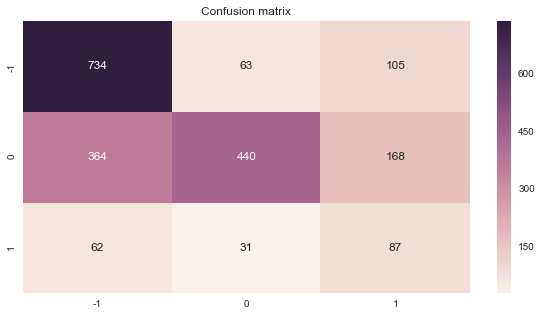

In [34]:
tfidf = TfidfVectorizer(ngram_range =(1,3), token_pattern='\S+')
tfidf.fit(train_data.pre2.values)

X_train = tfidf.transform(train_data.pre2.values)
X_test = tfidf.transform(test_data.pre2.values)

svc_rbf = SVC(class_weight='balanced',kernel = 'rbf',decision_function_shape='ovo')
grid_ln = GridSearchCV(cv=5, scoring='f1_weighted', estimator=svc_rbf, 
                       param_grid={'C':[1000, 10000, 100000]})

experiments_3(X_train, y_train, grid_ln)

In [35]:
grid_ln.best_params_

{'C': 10000}

(2054, 669)
             precision    recall  f1-score   support

         -1       0.69      0.70      0.69       902
          0       0.65      0.74      0.70       972
          1       0.47      0.09      0.15       180

avg / total       0.65      0.67      0.65      2054

Макросредняя F1 мера -  0.5123567693235929
Микросредняя F1 мера -  0.6655306718597858


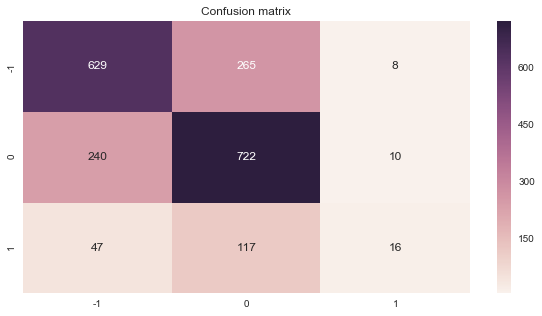

In [19]:
from sklearn.ensemble import RandomForestClassifier

tfidf = TfidfVectorizer(ngram_range =(1,1), token_pattern='\S+')
tfidf.fit(train_data.pre2.values)

X_train = tfidf.transform(train_data.pre2.values)
X_test = tfidf.transform(test_data.pre2.values)

rf = RandomForestClassifier(n_estimators=50, random_state=23, class_weight='balanced')
experiments_2(X_train, y_train, rf)

             precision    recall  f1-score   support

         -1       0.68      0.84      0.75       902
          0       0.76      0.64      0.69       972
          1       0.41      0.29      0.34       180

avg / total       0.69      0.69      0.69      2054

Макросредняя F1 мера -  0.5948487046605327
Микросредняя F1 мера -  0.6942551119766309


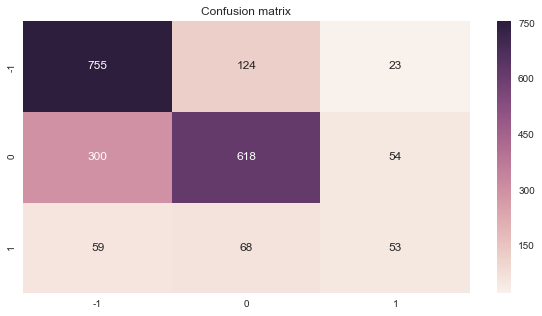

In [51]:
from sklearn.linear_model import LogisticRegressionCV

tfidf = TfidfVectorizer(ngram_range =(1,3), token_pattern='\S+')
tfidf.fit(train_data.pre2.values)

X_train = tfidf.transform(train_data.pre2.values)
X_test = tfidf.transform(test_data.pre2.values)

lgcv = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-20, 20))), 
                            scoring='f1_weighted',
                            class_weight='balanced',
                            multi_class='multinomial', 
                            random_state=23)
lgcv.fit(X_train, y_train)

y_pred = lgcv.predict(X_test)

    # замерим качество классификации
print(classification_report(y_test, y_pred))
print('Макросредняя F1 мера - ',f1_score(y_test, y_pred, average='macro'))
print('Микросредняя F1 мера - ',f1_score(y_test, y_pred, average='micro'))

labels = lgcv.classes_
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, 
                fmt="d", xticklabels=labels, yticklabels=labels, ax=ax)
plt.title("Confusion matrix")
plt.show()

             precision    recall  f1-score   support

         -1       0.70      0.83      0.76       902
          0       0.76      0.66      0.71       972
          1       0.40      0.32      0.36       180

avg / total       0.70      0.70      0.70      2054

Макросредняя F1 мера -  0.6063155158358028
Микросредняя F1 мера -  0.7035053554040895


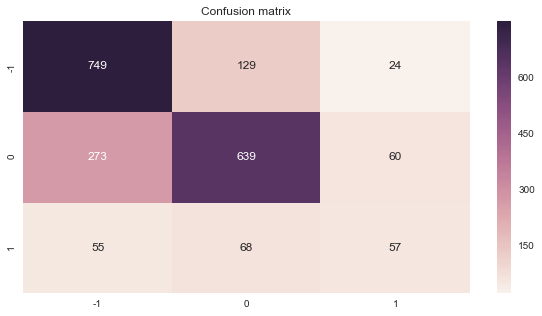

In [53]:
from sklearn.linear_model import LogisticRegressionCV

tfidf = TfidfVectorizer(ngram_range =(1,2), token_pattern='\S+')
tfidf.fit(train_data.pre2.values)

X_train = tfidf.transform(train_data.pre2.values)
X_test = tfidf.transform(test_data.pre2.values)

lgcv = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-20, 20))), 
                            scoring='f1_weighted',
                            class_weight='balanced',
                            multi_class='multinomial', 
                            random_state=23)
lgcv.fit(X_train, y_train)

y_pred = lgcv.predict(X_test)

    # замерим качество классификации
print(classification_report(y_test, y_pred))
print('Макросредняя F1 мера - ',f1_score(y_test, y_pred, average='macro'))
print('Микросредняя F1 мера - ',f1_score(y_test, y_pred, average='micro'))

labels = lgcv.classes_
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, 
                fmt="d", xticklabels=labels, yticklabels=labels, ax=ax)
plt.title("Confusion matrix")
plt.show()

(-0.5, 999.5, 499.5, -0.5)

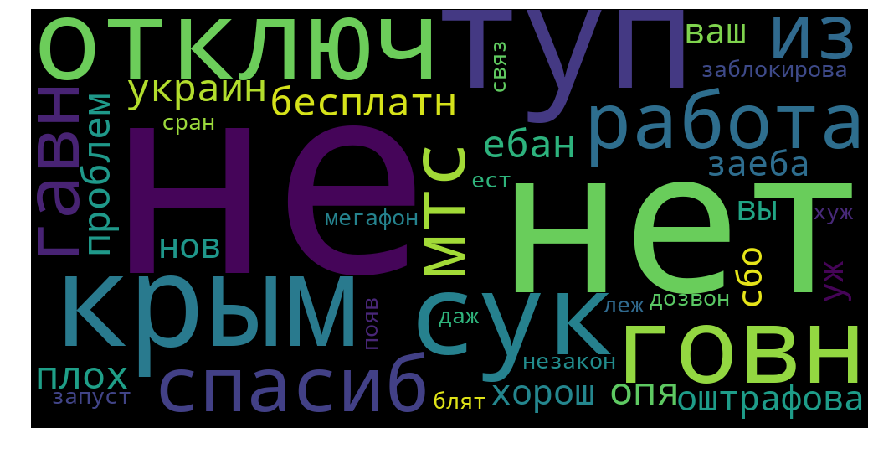

In [54]:
from wordcloud import WordCloud
top = 40
features = tfidf.get_feature_names()
importances = lgcv.coef_
classes = lgcv.classes_
words_with_weights = sorted(list(zip(features, importances[0])),key=lambda x: abs(x[1]), reverse=True)
only_words = [word for word,_ in words_with_weights][:top]

cloud = WordCloud(width=1000, height=500).generate(' '.join(only_words))
plt.figure(figsize=(15, 15))
plt.imshow(cloud)
plt.axis('off')

             precision    recall  f1-score   support

         -1       0.71      0.79      0.75       902
          0       0.74      0.68      0.71       972
          1       0.39      0.32      0.35       180

avg / total       0.70      0.70      0.70      2054

Макросредняя F1 мера -  0.6031628588886445
Микросредняя F1 мера -  0.6996105160662123


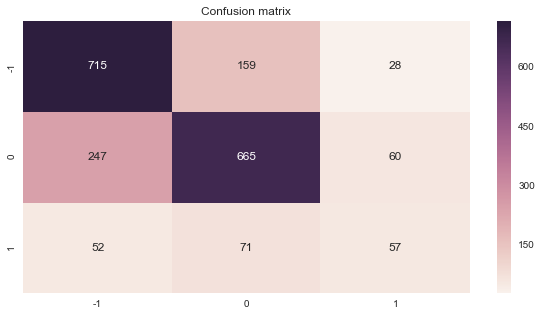

In [60]:
from sklearn.linear_model import LogisticRegressionCV

tfidf = TfidfVectorizer(ngram_range =(1,2), token_pattern='\S+')
tfidf.fit(train_data.pre.values)

X_train = tfidf.transform(train_data.pre.values)
X_test = tfidf.transform(test_data.pre.values)

lgcv = LogisticRegressionCV(Cs=list(np.power(10.0, np.arange(-20, 20))), 
                            scoring='f1_weighted',
                            class_weight='balanced',
                            multi_class='multinomial', 
                            random_state=23)
lgcv.fit(X_train, y_train)

y_pred = lgcv.predict(X_test)

    # замерим качество классификации
print(classification_report(y_test, y_pred))
print('Макросредняя F1 мера - ',f1_score(y_test, y_pred, average='macro'))
print('Микросредняя F1 мера - ',f1_score(y_test, y_pred, average='micro'))

labels = lgcv.classes_
fig, ax = plt.subplots(figsize=(10,5))
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, 
                fmt="d", xticklabels=labels, yticklabels=labels, ax=ax)
plt.title("Confusion matrix")
plt.show()

(-0.5, 999.5, 499.5, -0.5)

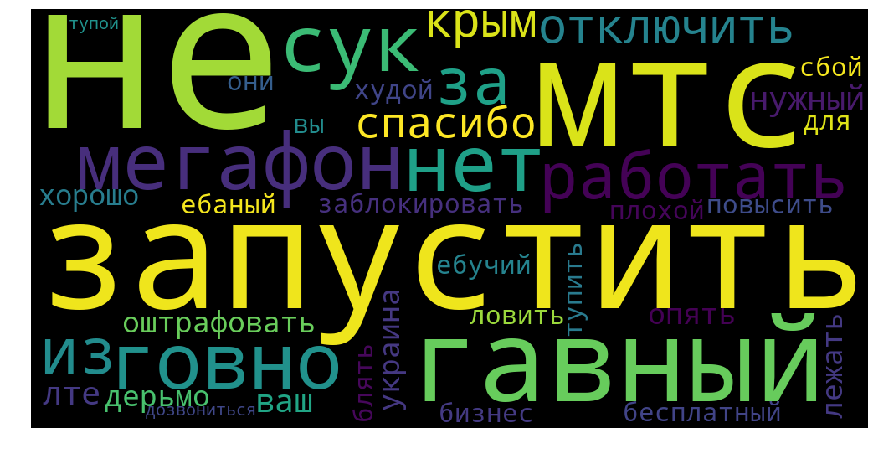

In [61]:
top = 40
features = tfidf.get_feature_names()
importances = lgcv.coef_
classes = lgcv.classes_
words_with_weights = sorted(list(zip(features, importances[0])),key=lambda x: abs(x[1]), reverse=True)
only_words = [word for word,_ in words_with_weights][:top]

cloud = WordCloud(width=1000, height=500).generate(' '.join(only_words))
plt.figure(figsize=(15, 15))
plt.imshow(cloud)
plt.axis('off')